# Confidence interval

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
#-------------------
import scipy.stats as stats
import statistics

In [2]:
# read data and create DataFram
path = "D:/Last project Data Analayses/Music Analysis/data/processed/Dataframe"
dir_list = os.listdir(path)
variable_names = dir_list.copy()
for i in range(len(variable_names)):
    variable_names[i] = variable_names[i].replace(".csv","")

file_names = dir_list

for var_name, file_name in zip(variable_names, file_names):
    print(f"name {var_name}    and file {var_name}")
    globals()[var_name] = pd.read_csv(f'D:/Last project Data Analayses/Music Analysis/data/processed/Dataframe/{file_name}').drop("Unnamed: 0", axis=1)


name album    and file album
name artist    and file artist
name customer    and file customer
name employee    and file employee
name genre    and file genre
name invoice    and file invoice
name invoiceline    and file invoiceline
name mediatype    and file mediatype
name playlist    and file playlist
name playlisttrack    and file playlisttrack
name track    and file track


Is the length of songs the same in different genres? Calculate their 95% confidence interval for the mean length of songs in each genre

In [3]:
track.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3503 entries, 0 to 3502
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TrackId       3503 non-null   int64  
 1   Name          3503 non-null   object 
 2   AlbumId       3503 non-null   int64  
 3   MediaTypeId   3503 non-null   int64  
 4   GenreId       3503 non-null   int64  
 5   Composer      2526 non-null   object 
 6   Milliseconds  3503 non-null   int64  
 7   Bytes         3503 non-null   int64  
 8   UnitPrice     3503 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 246.4+ KB


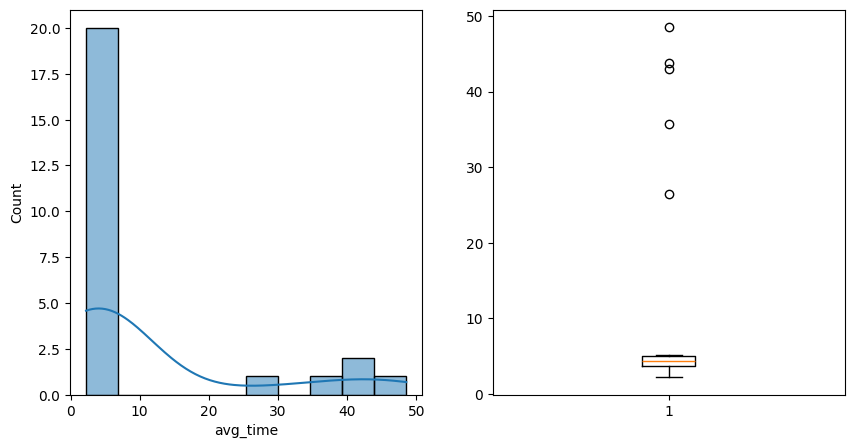

In [4]:
# genre and time with track id
# genre and avg time in each genre
genre_track_time = (track[['TrackId', 'GenreId','Milliseconds']]).rename(columns ={'Milliseconds':'min'} )
genre_track_time['min'] = genre_track_time['min'] / 60000
genre_count_track_avrage_time = (genre_track_time.groupby('GenreId')
                                .agg(count_track=('TrackId',np.count_nonzero),
                                    avg_time = ('min', np.average))
                                    .reset_index())
genre_count_track_avrage_time
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(genre_count_track_avrage_time['avg_time'], kde=True, bins=10)
plt.subplot(1,2,2)
plt.boxplot(genre_count_track_avrage_time['avg_time'])
plt.show()

## Assumption test
2 way:

1. All Data ( outlier data )

2. Data without outliers

In [5]:
# way 1
# test stats.kruskal
# more than 2 variables and Unnormal
kruskal_test_avg_time = list(genre_count_track_avrage_time['avg_time'])
stat, p_value = stats.kruskal(*kruskal_test_avg_time)

alpha = 0.05
if p_value < alpha:
    print("H0 is false: The average length of songs in different genres is the same")
else:
    print("H0 is True: The average length of songs in different genres is not the same")



H0 is True: The average length of songs in different genres is not the same


In [6]:
#way 2 without outliers

kruskal_test_avg_time = genre_count_track_avrage_time['avg_time']
Q1 = np.quantile(kruskal_test_avg_time, 0.25)
Q2 = np.quantile(kruskal_test_avg_time, 0.50)
Q3 = np.quantile(kruskal_test_avg_time, 0.75)
IQR = Q3-Q1
kruskal_test_avg_time_clear = list(kruskal_test_avg_time[(kruskal_test_avg_time > (Q1 - 1.5*IQR)) &
                                                    (kruskal_test_avg_time < (Q3 + 1.5*IQR))])

kruskal_test_avg_time_clear

stat, p_value = stats.kruskal(*kruskal_test_avg_time_clear)

alpha = 0.05
if p_value < alpha:
    print("H0 is false: The average length of songs in different genres is the same")
else:
    print("H0 is True: The average length of songs in different genres is not the same")


H0 is True: The average length of songs in different genres is not the same


Confidence interval

In [96]:
genre_count_track_avrage_time[['lower_bound', 'upper_bound']]=[0,0]

def bound(data, conidence_level):
    """Find lower_bound and upper_bound
    import data and conidence_level
    """
    time_mean = np.mean(data)
    time_std = np.std(data)
    n = len(data)
    z = stats.norm.ppf(1 - (1 - conidence_level) / 2) # critical value
    standard_error = time_std / np.sqrt(n)
    lower_bound = time_mean - z * standard_error
    upper_bound = time_mean + z * standard_error
    bound_value = [lower_bound, upper_bound]
    return bound_value

conidence_level = 0.95
for i in range(len(genre_count_track_avrage_time['GenreId'])):
    j = genre_count_track_avrage_time.iloc[i]['GenreId']
    
    data = genre_track_time[genre_track_time['GenreId'] == j]['min']
    bound_value = bound(data, conidence_level)
    genre_count_track_avrage_time.at[i,'lower_bound'] = bound_value[0]
    genre_count_track_avrage_time.at[i,'upper_bound'] = bound_value[1]

genre_count_track_avrage_time.head()



C:\Users\user\Oracel19c\admin\orcl\Temp\ipykernel_11364\2995870487.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.616869640340029' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  genre_count_track_avrage_time.at[i,'lower_bound'] = bound_value[0]
C:\Users\user\Oracel19c\admin\orcl\Temp\ipykernel_11364\2995870487.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.846798465545348' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  genre_count_track_avrage_time.at[i,'upper_bound'] = bound_value[1]


,GenreId,count_track,avg_time,lower_bound,upper_bound
0,1,1297,4.731834,4.616870,4.846798
1,2,130,4.862590,4.494074,5.231105
2,3,374,5.162491,4.980497,5.344484
3,4,332,3.905897,3.764984,4.046811
4,5,12,2.244058,2.059170,2.428947


What is the average sales in different countries? Calculate the 95% confidence interval for the mean sales in each country

In [36]:
country_quantity_price = pd.merge(pd.merge(invoiceline, invoice[['InvoiceId', 'CustomerId']]
                                 , left_on='InvoiceId', right_on='InvoiceId'), 
                                 customer[['CustomerId', 'Country']],
                                 right_on='CustomerId' , left_on='CustomerId')
country_quantity_price['total_price'] = country_quantity_price['Quantity'] * country_quantity_price['UnitPrice']
country_quantity_total_price = country_quantity_price[['Country', 'Quantity', "total_price"]]

country_sum_quantity_avg_total_price = (country_quantity_total_price.groupby('Country')
                                         .agg(sum_quantity = ('Quantity' , np.sum),
                                         avg_total_price = ('total_price', np.average))
                                         .reset_index()
                                         .sort_values(by="avg_total_price",ascending=False))


country_sum_quantity_avg_total_price.head()

C:\Users\user\Oracel19c\admin\orcl\Temp\ipykernel_11364\765346684.py:9: FutureWarning: The provided callable <function sum at 0x000001CA7F10D6C0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  .agg(sum_quantity = ('Quantity' , np.sum),


,Country,sum_quantity,avg_total_price
6,Chile,38,1.226842
12,Hungary,38,1.200526
14,Ireland,38,1.200526
7,Czech Republic,76,1.187368
2,Austria,38,1.121579


In [32]:
# kruskal test

country_sum_quantity_avg_total_price = list(country_sum_quantity_avg_total_price['avg_total_price'])
stat, p_value = stats.kruskal(*kruskal_test_avg_time)

alpha = 0.05
if p_value < alpha:
    print("H0 is false: The average length of songs in different genres is the same")
else:
    print("H0 is True: The average length of songs in different genres is not the same")


H0 is True: The average length of songs in different genres is not the same


In [98]:
country_sum_quantity_avg_total_price[['lower_bound', 'upper_bound']]=[0,0]

def bound(data, conidence_level):
    """Find lower_bound and upper_bound
    import data and conidence_level
    """
    mean = np.mean(data)
    std = np.std(data)
    n = len(data)
    z = stats.norm.ppf(1 - (1 - conidence_level) / 2) # critical value
    standard_error = std / np.sqrt(n)
    lower_bound = mean - z * standard_error
    upper_bound = mean + z * standard_error
    bound_value = [lower_bound, upper_bound , mean]
    return bound_value


conidence_level = 0.95
for i in range(len(country_sum_quantity_avg_total_price['Country'])):
    
    j = country_sum_quantity_avg_total_price.loc[i]['Country']
    
    data = country_quantity_total_price[country_quantity_total_price['Country'] == j]['total_price']
    # print(np.array(data))
    bound_value = bound(data, conidence_level)
    
    country_sum_quantity_avg_total_price.at[i,'lower_bound'] = bound_value[0]
    country_sum_quantity_avg_total_price.at[i,'upper_bound'] = bound_value[1]
    
country_sum_quantity_avg_total_price.head()

C:\Users\user\Oracel19c\admin\orcl\Temp\ipykernel_11364\2927703668.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.9900000000000002' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  country_sum_quantity_avg_total_price.at[i,'lower_bound'] = bound_value[0]
C:\Users\user\Oracel19c\admin\orcl\Temp\ipykernel_11364\2927703668.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.9900000000000004' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  country_sum_quantity_avg_total_price.at[i,'upper_bound'] = bound_value[1]


,Country,sum_quantity,avg_total_price,lower_bound,upper_bound
6,Chile,38,1.226842,1.091668,1.362016
12,Hungary,38,1.200526,1.070904,1.330148
14,Ireland,38,1.200526,1.070904,1.330148
7,Czech Republic,76,1.187368,1.097886,1.276851
2,Austria,38,1.121579,1.014102,1.229056


What is the average number of songs purchased by each user? Calculate the 95% confidence interval for the mean number of songs purchased by each user

In [122]:
customer_quantity_price = pd.merge(invoiceline, invoice[['InvoiceId', 'CustomerId']]
                                 , left_on='InvoiceId', right_on='InvoiceId')

customer_quantity_price['total_price'] = customer_quantity_price['Quantity'] * customer_quantity_price['UnitPrice']
customer_quantity_total_price = customer_quantity_price[['CustomerId', 'Quantity', "total_price"]]

customer_sum_quantity_avg_total_price = (customer_quantity_total_price.groupby('CustomerId')
                                         .agg(sum_quantity = ('Quantity' , np.sum),
                                         avg_total_price = ('total_price', np.average))
                                         .reset_index()
                                         .sort_values(by="avg_total_price",ascending=False))

C:\Users\user\Oracel19c\admin\orcl\Temp\ipykernel_11364\550292531.py:8: FutureWarning: The provided callable <function sum at 0x000001CA7F10D6C0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  .agg(sum_quantity = ('Quantity' , np.sum),


In [124]:
# kruskal test

customer_sum_quantity_avg_total_price_l = list(customer_sum_quantity_avg_total_price['avg_total_price'])
stat, p_value = stats.kruskal(*kruskal_test_avg_time)

alpha = 0.05
if p_value < alpha:
    print("H0 is false: The average length of songs in different genres is the same")
else:
    print("H0 is True: The average length of songs in different genres is not the same")


H0 is True: The average length of songs in different genres is not the same


In [126]:
customer_sum_quantity_avg_total_price[['lower_bound', 'upper_bound']]=[0,0]

def bound(data, conidence_level):
    """Find lower_bound and upper_bound
    import data and conidence_level
    """
    mean = np.mean(data)
    std = np.std(data)
    n = len(data)
    z = stats.norm.ppf(1 - (1 - conidence_level) / 2) # critical value
    standard_error = std / np.sqrt(n)
    lower_bound = mean - z * standard_error
    upper_bound = mean + z * standard_error
    bound_value = [lower_bound, upper_bound , mean]
    return bound_value


conidence_level = 0.95
for i in range(len(customer_sum_quantity_avg_total_price['CustomerId'])):
    
    j = customer_sum_quantity_avg_total_price.loc[i]['CustomerId']
    
    data = customer_quantity_total_price[customer_quantity_total_price['CustomerId'] == j]['total_price']
    # print(np.array(data))
    bound_value = bound(data, conidence_level)
    
    customer_sum_quantity_avg_total_price.at[i,'lower_bound'] = bound_value[0]
    customer_sum_quantity_avg_total_price.at[i,'upper_bound'] = bound_value[1]
    
customer_sum_quantity_avg_total_price.head()

C:\Users\user\Oracel19c\admin\orcl\Temp\ipykernel_11364\271573487.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.9716347511779277' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  customer_sum_quantity_avg_total_price.at[i,'lower_bound'] = bound_value[0]
C:\Users\user\Oracel19c\admin\orcl\Temp\ipykernel_11364\271573487.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.1136284067168098' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  customer_sum_quantity_avg_total_price.at[i,'upper_bound'] = bound_value[1]


,CustomerId,sum_quantity,avg_total_price,lower_bound,upper_bound
5,6,38,1.305789,1.157998,1.453581
25,26,38,1.253158,1.113150,1.393166
56,57,38,1.226842,1.091668,1.362016
45,46,38,1.200526,1.070904,1.330148
44,45,38,1.200526,1.070904,1.330148
